project done by MAUZUM SHAMIL


# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras 
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os



In [2]:
encoder = OneHotEncoder()
encoder.fit([[1],[0]])

# 0 = no fire 
# 1 = fire

OneHotEncoder()

# IMAGE PROCESSING

In [3]:
# fire

data = []
result = []
paths = []

for r,d,f in os.walk(r"C:\Users\dell\Desktop\fire_dataset\fire_images"):
    for file  in f:
        if '.jpg' or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [4]:
# no fire 

paths = []
 
for r,d,f in os.walk(r"C:\Users\dell\Desktop\fire_dataset\non_fire_images"):
    for file in f:
        if '.jpg' or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [6]:
data = np.array(data)
data.shape

(789, 128, 128, 3)

In [7]:
result = np.array(result)
result.shape

(789, 1, 2)

In [10]:
result = result.reshape(789,2)
result.shape

(789, 2)

# VISUALIZATION

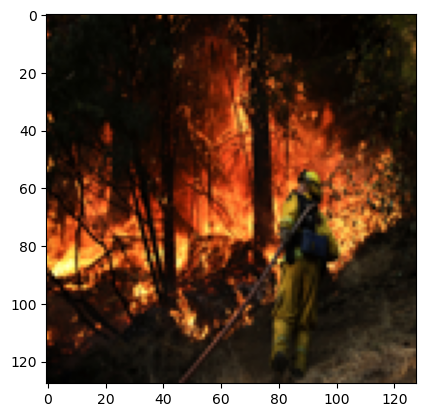

In [11]:
plt.imshow(data[200])

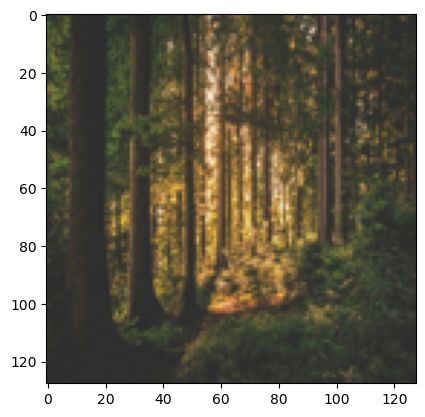

In [15]:
plt.imshow(data[780])

# MODEL TRAINING AND MODEL BUILDING

In [16]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.2,shuffle=True,random_state=0)

# model building

In [19]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(2,2),input_shape =(128,128,3),padding='Same'))
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))

print(model.summary())

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [21]:
x_train.shape

(631, 128, 128, 3)

In [22]:
y_train.shape

(631, 2)

# MODEL FITTING 

In [23]:
history = model.fit(x_train,y_train,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7099 - loss: 14.9764
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9358 - loss: 1.5989
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9221 - loss: 0.6543
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9628 - loss: 0.2206
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9579 - loss: 0.2333
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9667 - loss: 0.1186
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9761 - loss: 0.0811
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9854 - loss: 0.0451
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9703 - loss: 0.0798
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9740 - loss: 0.0839


# PERFORMANCE ANALYSIS

In [24]:
scores = model.evaluate(x_test,y_test,batch_size=64)
print("the accuracy : %0.2f%%" % (100 * scores[1]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.8896 - loss: 0.9730
the accuracy : 89.24%


# CONCLUSION AND PREDICTION

In [25]:
def names(number):
    if number==1:
        return 'FIRE IS DETECTED'
    else:
        return 'NO FIRE IS DETECTED'

NO FIRE IS DETECTED


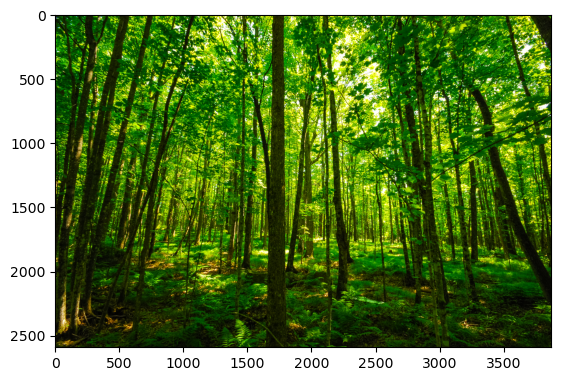

In [30]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\fire_dataset\non_fire_images\non_fire.22.png")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

FIRE IS DETECTED


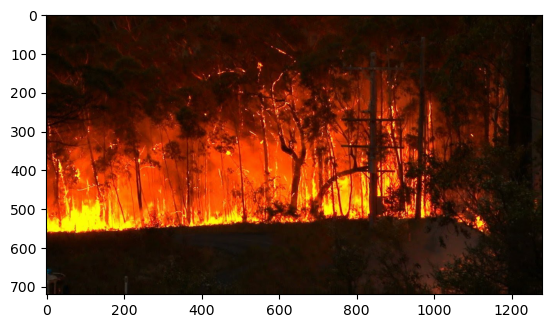

In [31]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\fire_dataset\fire_images\fire.3.png")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

NO FIRE IS DETECTED


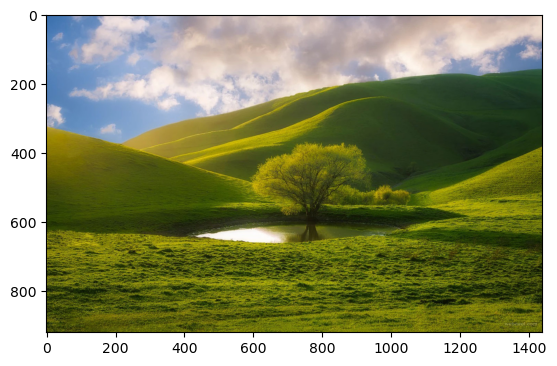

In [33]:
# images from googles

from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Downloads\nofire.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

FIRE IS DETECTED


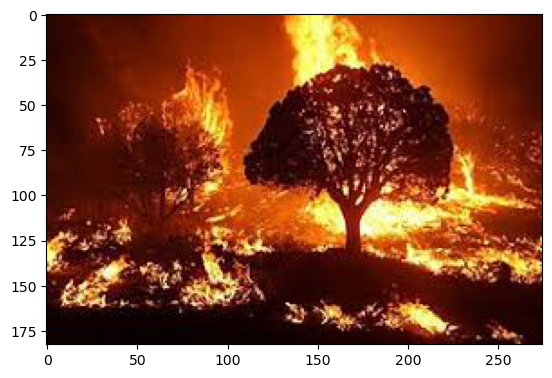

In [34]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Downloads\fire1.jpeg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))